# Higgs Boson Machine Learning Challenge with `Pandas` and `Scikit Learn`

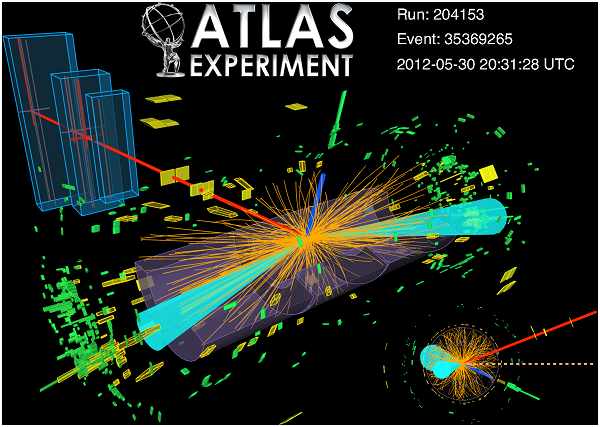

In [1]:
from IPython.core.display import Image
Image('https://kaggle2.blob.core.windows.net/competitions/kaggle/3887/media/ATLASEXP_image.png')

Kaggle is a place where peope meet to work on **Data Mining** problems derived from science
Visit: https://www.kaggle.com/c/higgs-boson for more information

This notebook is based on **Darin Baumgartel**, you can find his original implementation here:
https://dbaumgartel.wordpress.com/author/dbaumgartel/

For This Classification Problem he uses Gradient Boosted Trees.
This Machine Learning Technique is described in a detailed way in another ipython notebook here:
http://nbviewer.ipython.org/urls/s3.amazonaws.com/datarobotblog/notebooks/gbm-tutorial.ipynb

This notebook represents my personal notes on the implementation by Darin Baumgartel. He had the idea, i followed him, but changed the way of representation of the data by using Pandas

In [3]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier as GBC
from pandas import read_csv, DataFrame
import os
import pickle


The Data can be downloaded here:
    http://www.kaggle.com/c/higgs-boson/data

In [5]:
'''print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Scikit version ' + sk.__version__)
'''

"print('Python version ' + sys.version)\nprint('Pandas version ' + pd.__version__)\nprint('Numpy version ' + np.__version__)\nprint('Scikit version ' + sk.__version__)\n"

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [7]:
pd.set_option('display.notebook_repr_html', True)

In [8]:
train_data=read_csv('training.csv', sep=',')#read data

In [9]:
train_data.iloc[:10,:5]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h
0,100000,138.470,51.655,97.827,27.980
1,100001,160.937,68.768,103.235,48.146
2,100002,-999.000,162.172,125.953,35.635
3,100003,143.905,81.417,80.943,0.414
4,100004,175.864,16.915,134.805,16.405
5,100005,89.744,13.550,59.149,116.344
6,100006,148.754,28.862,107.782,106.130
7,100007,154.916,10.418,94.714,29.169
8,100008,105.594,50.559,100.989,4.288
9,100009,128.053,88.941,69.272,193.392


In [10]:
add=train_data['Label'].replace(to_replace=['s','b'],value=[1,0])

In [11]:
train_data['class_int']=add

In [12]:
train_data.iloc[:10,31:34]

,Weight,Label,class_int
0,0.002653,s,1
1,2.233584,b,0
2,2.347389,b,0
3,5.446378,b,0
4,6.245333,b,0
5,0.083414,b,0
6,0.002653,s,1
7,0.018636,s,1
8,5.296003,b,0
9,0.001502,s,1


In [ ]:
#from sklearn import svm

We will use 90% of the training data to train our model 10% will be used to validate it.
Before we make a submission we should test our model, this is why we keep 10% for validation

In [13]:
train_ind=int(0.9*train_data.shape[0])

In [14]:
train_ind

225000

In [15]:
train_data.shape

(250000, 34)

`rat` is the Ration 

In [16]:
rat=float(train_ind)/int(train_data.shape[0])
rat

0.9

In [17]:
var_no=31#number var to input
var_start=0

#these where used just for some testing, not used in this version
no_train=10000#trainings dataset to input
predict_to=15000#show prediction up to

#setting up our data for testing, validating and the weights that are used to calculate a metric
#later
x_tr=train_data.iloc[:train_ind,1:var_no].values#event ID not in training please correct!
y_tr=train_data.iloc[:train_ind,33].values
x_val=train_data.iloc[train_ind:,1:var_no].values
y_val=train_data.iloc[train_ind:,33].values

#weights
w_tr=train_data.iloc[:train_ind,var_no].values
w_val=train_data.iloc[train_ind:,var_no].values

The Next Cell runs about 4 minutes on my laptop

If you want to keep the model as it is, you can use `pickle` which lets you save
in a binary way.

If you already trained your model you can load it up now with the following command:
remember to comment your `scikit` command in this case

In [ ]:
#Load old session

#my_object_file = open('classifiers.pkl', 'rb')
#clf = pickle.load(my_object_file)
#my_object_file.close()

In [18]:
#clf = svm.SVC(probability=True)
#clf.fit(train_data.iloc[:no_train,:var_no].values,train_data.iloc[:no_train,33].values,sample_weight=train_data.iloc[:no_train,31].values)#sample_weight=train_data.iloc[:no_train,31].values

clf = GBC(n_estimators=50, max_depth=5,min_samples_leaf=200,max_features=10,verbose=1)
clf.fit(x_tr,y_tr) 

      Iter       Train Loss   Remaining Time 
         1           1.2174           44.72s
         2           1.1633           45.05s
         3           1.1205           43.86s
         4           1.0780           42.53s
         5           1.0397           41.01s
         6           1.0136           39.38s
         7           0.9857           38.43s
         8           0.9611           37.29s
         9           0.9430           36.16s
        10           0.9250           35.15s
        20           0.8207           25.33s
        30           0.7762           16.43s
        40           0.7540            8.07s
        50           0.7412            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=10, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=200,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False)

#### The following code shows how to save the classifier for later use

In [ ]:

###put it to file to load it later 
#pickle_out = open('classifiers.pkl', 'wb')
#pickle.dump(clf, pickle_out)
#pickle_out.close()

In [19]:
y_tr_pre=clf.predict(x_tr)#makes a prediction for our training data

### A '1' is a prediction for a "signal like event" a '0' represents a "background signal"

You can clearly see that the model makes some wrong decisions in the beginnin of data,
but the amount of data is huge so do not be concerned

In [20]:
y_tr_pre[:15]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [21]:
y_tr[:15]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

### The Model has a decision rule. 
### If it estimates a probability above 0.5 it marks the dataset as a "signal like event"

In [22]:
prob_pre_tr=clf.predict_proba(x_tr)[:,1]#just takes the second column the first is the 'reverse probab.'
prob_pre_val=clf.predict_proba(x_val)[:,1]


Look at the following two cells and you understand the concepts

In [23]:
prob_pre_tr[:15]

array([ 0.45527284,  0.43703985,  0.12375055,  0.08432385,  0.12149537,
        0.11512037,  0.74105778,  0.86567807,  0.49654664,  0.72045764,
        0.05443856,  0.5986533 ,  0.74539246,  0.28837078,  0.03605433])

In [24]:
y_tr_pre[:15]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [25]:
pcut = np.percentile(prob_pre_tr,88)# i take 88 percent as the new cut for marking a "SLE"

In [ ]:
pcut#everything above this value is considered a "Signal"

In [26]:
Yhat_tr = prob_pre_tr > pcut 
Yhat_val = prob_pre_val > pcut

In [27]:
Yhat_tr[0:15]

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False], dtype=bool)

In [28]:
y_tr

array([1, 0, 0, ..., 1, 0, 0])

In [29]:
w_tr[:15]

array([  2.65331134e-03,   2.23358449e+00,   2.34738894e+00,
         5.44637821e+00,   6.24533269e+00,   8.34140313e-02,
         2.65331134e-03,   1.86361167e-02,   5.29600299e+00,
         1.50187016e-03,   2.29950374e+00,   3.07169524e-01,
         1.68161144e+00,   2.18389154e+00,   2.15119867e+00])

### The Metric 'penalizes' according to the weight that is linked with an event.

In [31]:
TruePositive_train = w_tr*(y_tr==1.0)*(1.0/rat)
TrueNegative_train = w_tr*(y_tr==0.0)*(1.0/rat)
TruePositive_valid = w_val*(y_val==1.0)*(1.0/(1-rat))
TrueNegative_valid = w_val*(y_val==0.0)*(1.0/(1-rat))

In [32]:
s_train = sum ( TruePositive_train*(Yhat_tr==1.0) )#here only the "cases" are summed where prediction and "real" signal come together
b_train = sum ( TrueNegative_train*(Yhat_tr==1.0) )#...
s_valid = sum ( TruePositive_valid*(Yhat_val==1.0) )
b_valid = sum ( TrueNegative_valid*(Yhat_val==1.0) )

In [34]:
import math
print('Calculating AMS score for a probability cutoff pcut=',pcut)
def AMSScore(s,b): return  math.sqrt (2.*( (s + b + 10.)*math.log(1.+s/(b+10.))-s))
print( '   - AMS based on %s %% training   sample:' % (rat*100),AMSScore(s_train,b_train))
print('   - AMS based on %s %% validation sample:' % ((1-rat)*100),(AMSScore(s_valid,b_valid)))

('Calculating AMS score for a probability cutoff pcut=', 0.81976963045220574)
('   - AMS based on 90.0 % training   sample:', 3.4535000565209644)
('   - AMS based on 10.0 % validation sample:', 3.2603832841304814)


### Reading in the test data so we can make a prediction with our model

In [35]:
val_data=read_csv('test.csv', sep=',')#read data
X_val=val_data.iloc[:,1:var_no].values
Y_val=clf.predict_proba(X_val)[:,1]

In [36]:
val_data.iloc[:5,:5]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h
0,350000,-999.000,79.589,23.916,3.036
1,350001,106.398,67.490,87.949,49.994
2,350002,117.794,56.226,96.358,4.137
3,350003,135.861,30.604,97.288,9.104
4,350004,74.159,82.772,58.731,89.646


We prepare a new Dataframe now. 
Columns we need are: `probab_s` which is the **Probability fo a Signal like Event** and the following...

In [37]:
add=DataFrame(Y_val,columns=['probab_s'])

Yhat_val_wild = Y_val > pcut

add2=DataFrame(Yhat_val_wild,columns=['decision'])

fin=DataFrame([val_data.EventId,add.probab_s,add2.decision]).transpose()#concatenating the columns coming from different 
#DataFrames


In [38]:
fin.iloc[:5,:]

,EventId,probab_s,decision
0,350000.0,0.031369,0.0
1,350001.0,0.160609,0.0
2,350002.0,0.498109,0.0
3,350003.0,0.818741,0.0
4,350004.0,0.037922,0.0


Now we sort the data because we need to give the Data sets a wheight according to this probabilities, we will look at the instructions...

In [39]:
sort_pro=fin.sort(['probab_s'],ascending=True)

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [40]:
sort_pro.head()

,EventId,probab_s,decision
409633,759633.0,0.016073,0.0
103086,453086.0,0.016928,0.0
136118,486118.0,0.017036,0.0
266283,616283.0,0.017059,0.0
417389,767389.0,0.017749,0.0


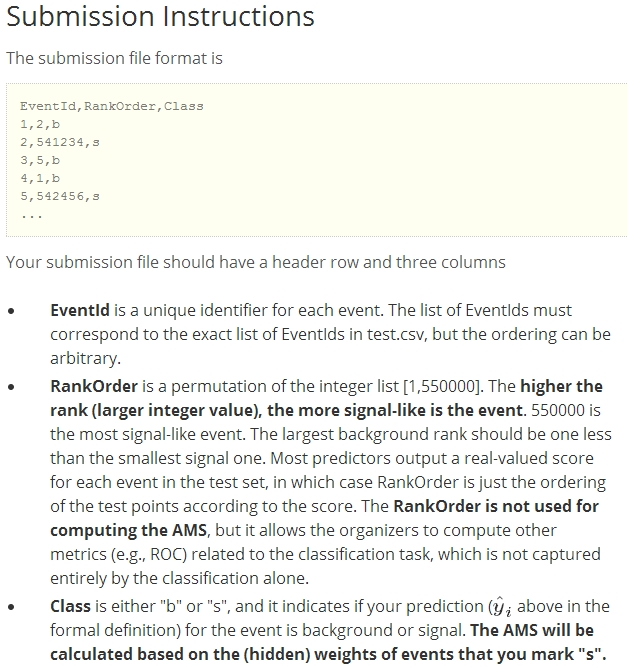

In [41]:
Image('http://i.imgur.com/XqU7N5w.jpg')

In [42]:
for i in range(0,X_val.shape[0],1):#sorting the ranks and placing them
    sort_pro.iloc[i,1]=i+1

### Here the column name is still wrong but we will change it

In [43]:
sort_pro.head()


,EventId,probab_s,decision
409633,759633.0,1.0,0.0
103086,453086.0,2.0,0.0
136118,486118.0,3.0,0.0
266283,616283.0,4.0,0.0
417389,767389.0,5.0,0.0


In [44]:
sort_back=sort_pro.sort(['EventId'],ascending=True)

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [50]:
sort_back.tail()

,EventId,RankOrder,Class
549995,899995,206951,b
549996,899996,380416,b
549997,899997,134126,b
549998,899998,382846,b
549999,899999,275515,b


Now we replace the numbers with string objects

In [46]:
sort_back['decision']=sort_back['decision'].map({1: 's', 0: 'b'})#replacing here

In [47]:
sort_back.head()

,EventId,probab_s,decision
0,350000.0,14935.0,b
1,350001.0,238539.0,b
2,350002.0,379499.0,b
3,350003.0,483382.0,b
4,350004.0,42677.0,b


In [52]:
sort_back.head()

,EventId,RankOrder,Class
0,350000,14935,b
1,350001,238539,b
2,350002,379499,b
3,350003,483382,b
4,350004,42677,b


In [51]:
sort_back.columns=['EventId','RankOrder','Class']#renaming so it is conform to task

sort_back[['EventId','RankOrder']]=sort_back[['EventId','RankOrder']].astype(int)#if we do not use integers here
#the 'to_csv' method will write floats here

sort_back.to_csv('test_submission.csv', sep=',',index=False,index_label=False)

### The Score with this model here is AMS= __**3.29880**__

Right now 

In [49]:
from datetime import datetime, date, time
now = datetime.now()
print(now)

2016-12-28 23:34:52.810034


## This is the best rank 	AMS = 3.80655